### 🧬 Breast Cancer Dataset - Column Descriptions

- **id** – Unique identifier for each patient.
- **diagnosis** – Tumor classification:  
  - `"M"` = Malignant (cancerous)  
  - `"B"` = Benign (non-cancerous)

#### 📊 Feature Descriptions (Mean Values)
- **radius_mean** – Average distance from center to perimeter points.
- **texture_mean** – Standard deviation of gray-scale values.
- **perimeter_mean** – Mean perimeter of cell nuclei.
- **area_mean** – Mean area of cell nuclei.
- **smoothness_mean** – Variation in radius lengths.
- **compactness_mean** – (Perimeter² / Area) - 1.0.
- **concavity_mean** – Severity of concave portions of the contour.
- **concave points_mean** – Number of concave portions of the contour.
- **symmetry_mean** – Symmetry of the cell nuclei.
- **fractal_dimension_mean** – Complexity of the cell border (fractal dimension).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Cleaning  data set

In [7]:
df.drop(columns = ['Unnamed: 32','id'], axis = 1, inplace  = True)

In [8]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

<Axes: xlabel='diagnosis', ylabel='count'>

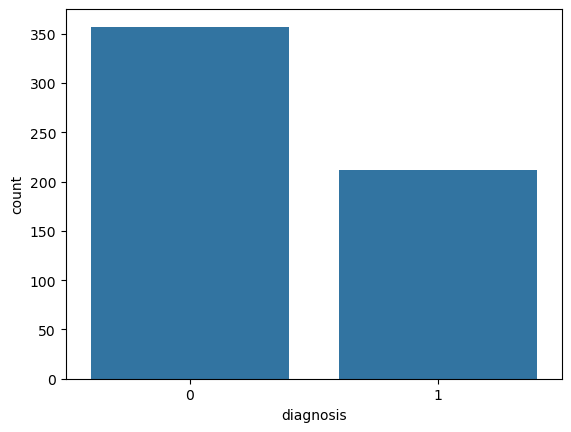

In [10]:
sns.countplot(x = 'diagnosis', data = df)

<Axes: xlabel='radius_mean', ylabel='Count'>

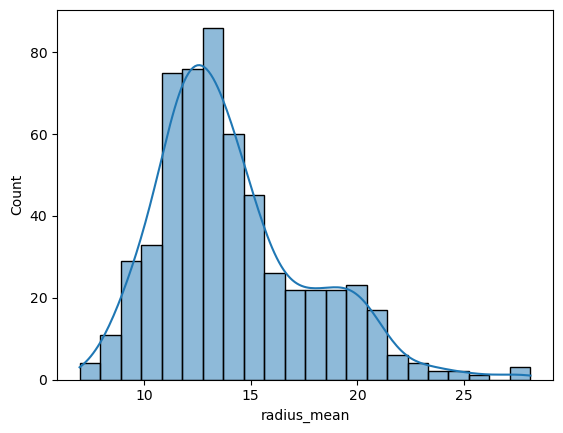

In [11]:
sns.histplot(x = 'radius_mean', data = df, kde = True)

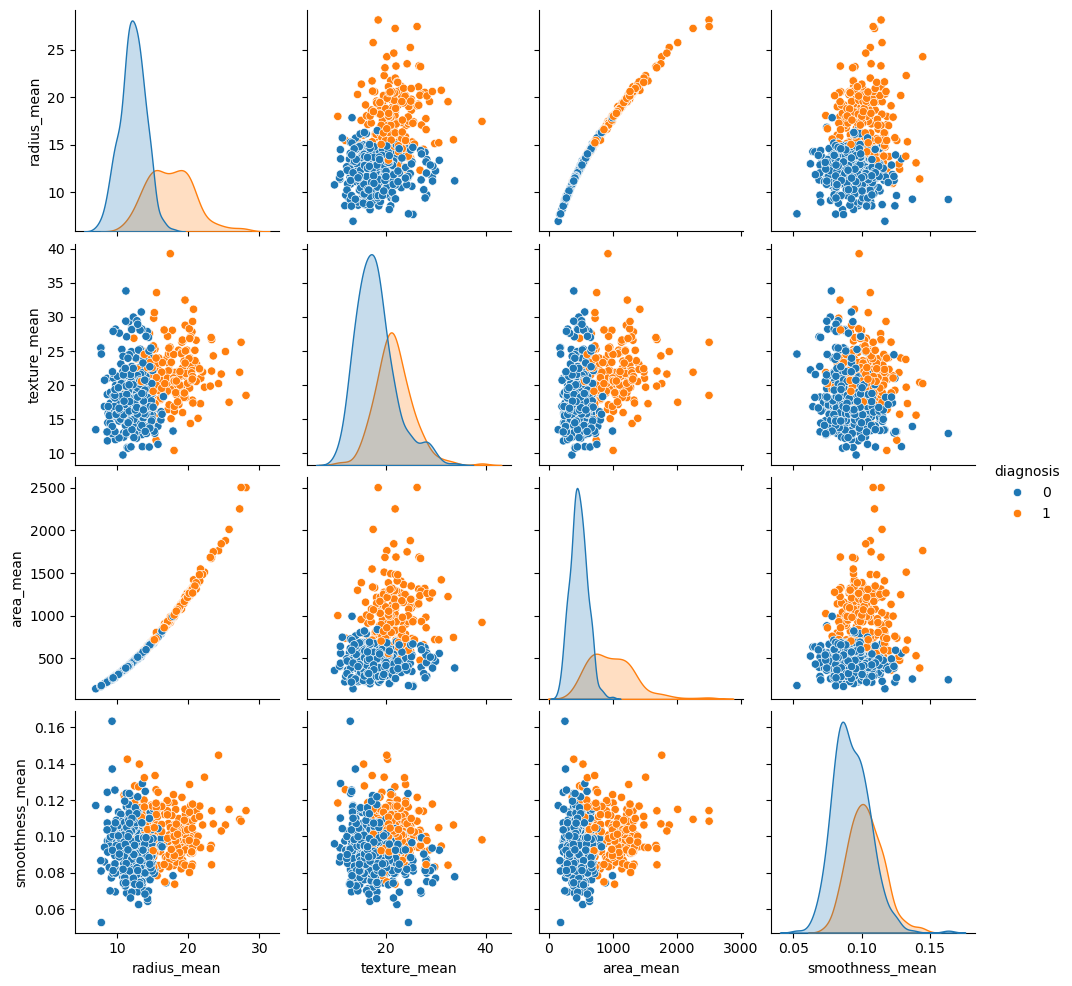

In [12]:
selected_features = ['radius_mean','texture_mean','area_mean','smoothness_mean','diagnosis']

sns.pairplot(df[selected_features], hue='diagnosis')
plt.show()

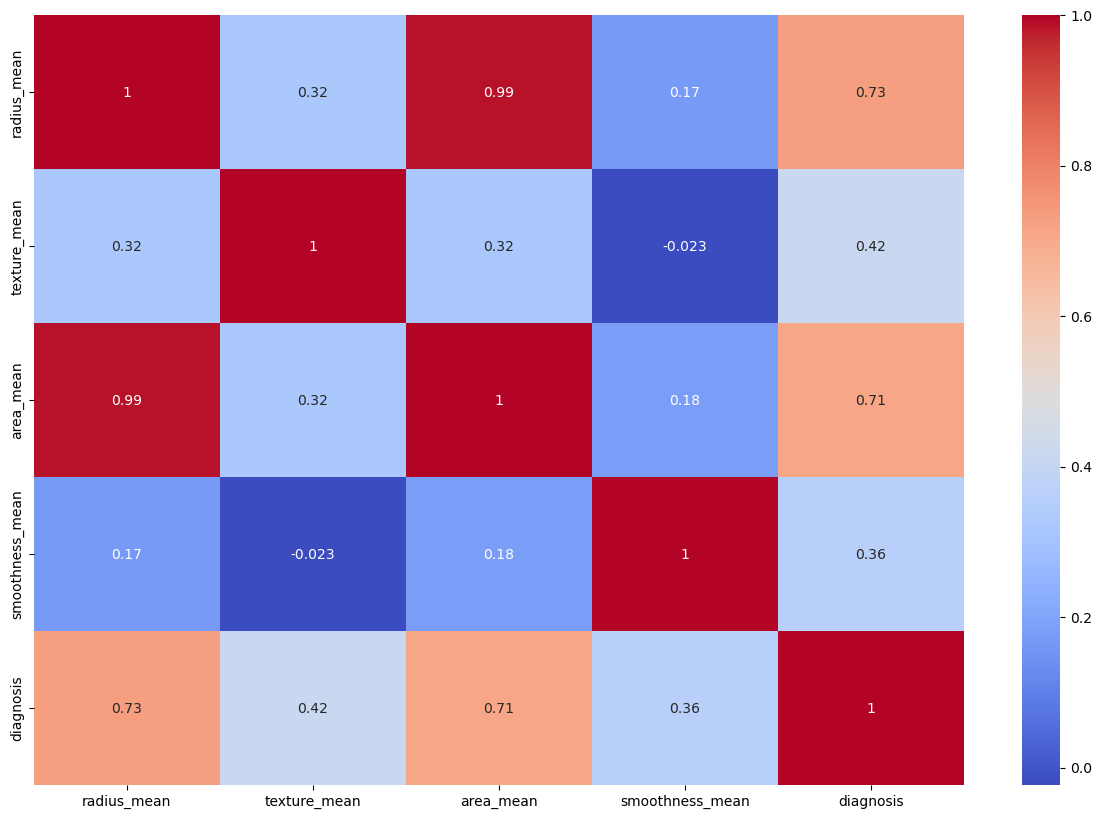

In [13]:
plt.figure(figsize=(15,10))
correlation = df[selected_features].corr()
sns.heatmap(correlation,cmap = 'coolwarm', annot = True)
plt.show()

In [14]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [45]:
X = df[['radius_mean','texture_mean','area_mean','smoothness_mean']]
y = df[['diagnosis']] 

In [46]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_transformed = scalar.fit_transform(X)
# y_transformed = scalar.fit_transform(y)


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape

(455, 4)

In [49]:
y_train.shape

(455, 1)

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [51]:
model.score(X_test, y_test)

0.9385964912280702

In [55]:
y_predc = model.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_predc, y_test)
cm

array([[68,  4],
       [ 3, 39]], dtype=int64)

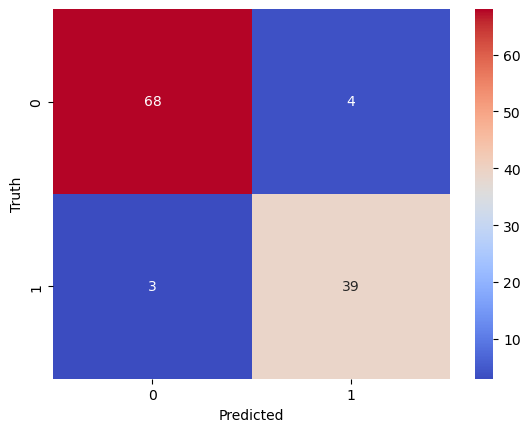

In [62]:
sns.heatmap(cm, cmap='coolwarm', annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()